In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data in the (yellow highlighted) Data
Folder in the file auto-mpg.data into a
pandas DataFrame.

Review the data and the provided data set
description.

Use the attribute information provided in
auto-mpg.names to name your pandas
DataFrame columns.

In [2]:
auto = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']).set_index('Car Name')
auto.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
Car Name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1


Some of the horsepower data is marked as
missing with a ‘?’. You need to replace this ‘?’
with a pandas-appropriate missing value, then
convert the column to numeric.

In [3]:
auto.replace("?", "NaN", inplace=True)
auto["Horsepower"] = auto["Horsepower"].astype(float)
auto.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

The origin column values are 1, 2, and 3.
Convert these values respectively to ‘USA’,
‘Asia’, and ‘Europe’

In [4]:
auto['Origin'].replace([1,2,3], (['USA', 'Asia', 'Europe']), inplace=True)
auto.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
Car Name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,USA
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,USA
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,USA
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,USA
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,USA


Create a bar chart that shows the distribution
for cylinders.

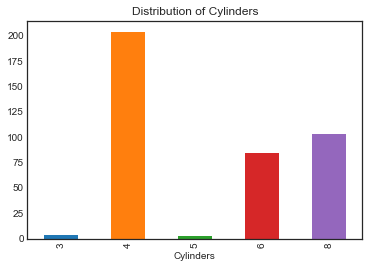

In [5]:
sns.set_style('white')
cylinders = auto.groupby('Cylinders')
cylinders['Cylinders'].count().plot.bar(title='Distribution of Cylinders')

Create a scatterplot that shows the
relationship between horsepower and weight.

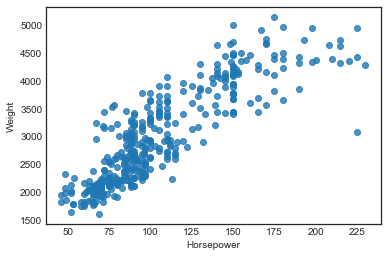

In [6]:
sns.regplot(x=auto['Horsepower'], y=auto['Weight'], fit_reg=False)

Ask, then answer (using matplotlib and
seaborn graphics capabilities) an interesting
question about the distribution of one of the
variables, or the relationship between two (or
more!) of the variables in the “Auto MPG”
dataset.

Horsepower vs Acceleration

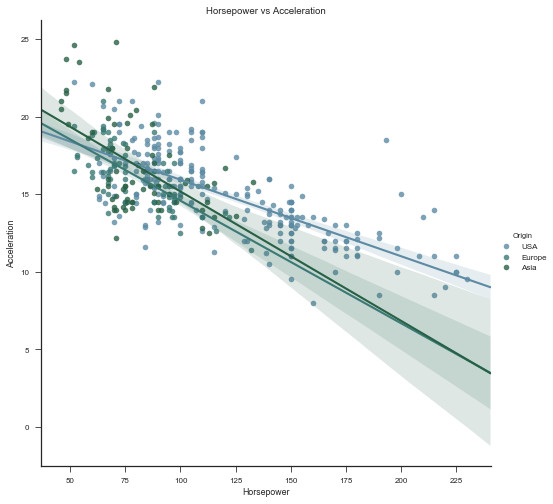

In [31]:
sns.set(style='ticks', context='paper')
auto_data = auto[['Horsepower', 'Acceleration', 'Origin']]
palette = sns.cubehelix_palette(3, 1.5, .75, light=.5, dark=.3)
grid = sns.lmplot(x='Horsepower', y='Acceleration', hue='Origin', data=auto_data, palette=palette, size=7)
plt.title('Horsepower vs Acceleration')
grid.set_axis_labels("Horsepower", "Acceleration")


Relationship between Horsepower vs Weight by Origin

Text(25.0747,0.5,u'Weight')

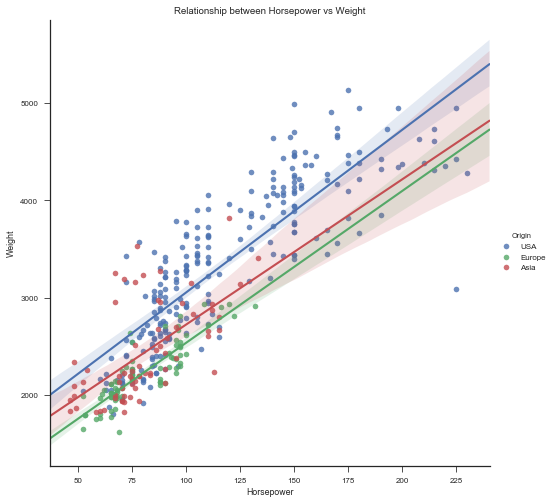

In [29]:
sns.lmplot(data = auto,
           x = 'Horsepower',
           y = 'Weight',
           hue = 'Origin',
           size = 7)

plt.title('Relationship between Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')

Scatterplot to show Horsepower to Miles per Gallon.

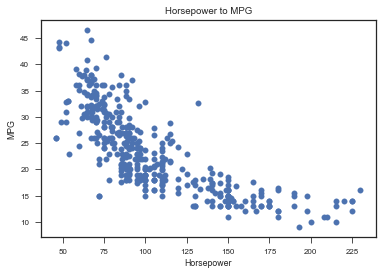

In [30]:
plt.scatter(auto['Horsepower'], auto['MPG'])
plt.title('Horsepower to MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()